In [24]:
from xgboost import XGBClassifier, XGBRegressor, XGBRanker
from catboost import CatBoostClassifier, CatBoostRegressor, CatBoostRanker
from lightgbm import LGBMClassifier, LGBMRegressor, LGBMRanker
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.datasets import make_classification, load_boston, load_iris
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt 


# a) gbm classifier techniques

In [2]:
x, y = make_classification(
    n_samples=5000, 
    n_features= 10, 
    n_classes=3, 
    n_clusters_per_class=1
)

In [3]:
print(x[0:1])
print(y[0:5])

[[ 0.05995586  1.37857789  0.59265925  1.05174694  0.8152756  -1.26083894
  -0.63804234 -0.74168377  1.17388488 -0.56954997]]
[0 2 0 2 2]


In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=42,test_size=.15)

In [5]:
xgbc = XGBClassifier(verbosity=0)
cb = CatBoostClassifier()
lgbmc = LGBMClassifier(verbose=0) 
rfc = RandomForestClassifier(verbose=0)
abc = AdaBoostClassifier()
dtc = DecisionTreeClassifier()

In [6]:
# train models 
xgbc.fit(xtrain,ytrain)
cb.fit(xtrain,ytrain)
lgbmc.fit(xtrain,ytrain)
rfc.fit(xtrain,ytrain)
abc.fit(xtrain,ytrain)
dtc.fit(xtrain,ytrain)

/Users/austinwilson/coding/SJSU/.venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Learning rate set to 0.085187
0:	learn: 0.9739004	total: 56.2ms	remaining: 56.2s
1:	learn: 0.8742303	total: 59ms	remaining: 29.5s
2:	learn: 0.7931804	total: 62.2ms	remaining: 20.7s
3:	learn: 0.7273423	total: 64.9ms	remaining: 16.1s
4:	learn: 0.6696818	total: 68.4ms	remaining: 13.6s
5:	learn: 0.6214641	total: 72ms	remaining: 11.9s
6:	learn: 0.5787048	total: 75.2ms	remaining: 10.7s
7:	learn: 0.5425484	total: 78.2ms	remaining: 9.7s
8:	learn: 0.5121404	total: 80.9ms	remaining: 8.91s
9:	learn: 0.4833231	total: 85ms	remaining: 8.42s
10:	learn: 0.4578009	total: 88ms	remaining: 7.91s
11:	learn: 0.4355218	total: 91.1ms	remaining: 7.5s
12:	learn: 0.4150770	total: 94ms	remaining: 7.13s
13:	learn: 0.3977498	total: 96.9ms	remaining: 6.82s
14:	learn: 0.3816857	total: 100ms	remaining: 6.59s
15:	learn: 0.3672788	total: 103ms	remaining: 6.35s
16:	learn: 0.3540077	total: 106ms	remaining: 6.15s
17:	learn: 0.3421121	total: 109ms	remaining: 5.96s
18:	learn: 0.3307704	total: 112ms	remaining: 5.77s
19:	learn

DecisionTreeClassifier()

In [7]:
# make predictions 
xgbc_pred = xgbc.predict(xtest)
cb_pred = cb.predict(xtest)
lgbmc_pred = lgbmc.predict(xtest)
rfc_pred = rfc.predict(xtest)
abc_pred = abc.predict(xtest)
dtc_pred = dtc.predict(xtest)

In [8]:
xgbc_cm = confusion_matrix(ytest, xgbc_pred)
cb_cm = confusion_matrix(ytest, cb_pred)
lgbmc_cm = confusion_matrix(ytest, lgbmc_pred)
rfc_cm = confusion_matrix(ytest, rfc_pred)
abc_cm = confusion_matrix(ytest, abc_pred)
dtc_cm = confusion_matrix(ytest, dtc_pred)

In [9]:
xgbc_cr = classification_report(ytest, xgbc_pred)
cb_cr = classification_report(ytest, cb_pred)
lgbmc_cr = classification_report(ytest, lgbmc_pred)
rfc_cr = classification_report(ytest, rfc_pred)
abc_cr = classification_report(ytest, abc_pred)
dtc_cr = classification_report(ytest, dtc_pred)

In [11]:
# score models on training data
xgbc_score = xgbc.score(xtrain,ytrain)
cb_score = cb.score(xtrain,ytrain)
lgbmc_score = lgbmc.score(xtrain,ytrain)
rfc_score = rfc.score(xtrain,ytrain)
abc_score = abc.score(xtrain,ytrain)
dtc_score = dtc.score(xtrain,ytrain)

In [13]:
# cross validation score
xgbc_cv_score = cross_val_score(xgbc, xtrain,ytrain)
cb_cv_score = cross_val_score(cb, xtrain,ytrain)
lgbmc_cv_score = cross_val_score(lgbmc, xtrain,ytrain)
rfc_cv_score = cross_val_score(rfc, xtrain,ytrain)
abc_cv_scire = cross_val_score(abc, xtrain,ytrain)
dtc_cv_score = cross_val_score(dtc, xtrain,ytrain)

/Users/austinwilson/coding/SJSU/.venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/austinwilson/coding/SJSU/.venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/austinwilson/coding/SJSU/.venv/lib/pyth

Learning rate set to 0.084223
0:	learn: 0.9799400	total: 3.81ms	remaining: 3.8s
1:	learn: 0.8810531	total: 7.39ms	remaining: 3.69s
2:	learn: 0.8001750	total: 10.6ms	remaining: 3.52s
3:	learn: 0.7337596	total: 13.5ms	remaining: 3.36s
4:	learn: 0.6762267	total: 16.1ms	remaining: 3.21s
5:	learn: 0.6272045	total: 19.7ms	remaining: 3.26s
6:	learn: 0.5859939	total: 23.5ms	remaining: 3.33s
7:	learn: 0.5487657	total: 27.6ms	remaining: 3.43s
8:	learn: 0.5161386	total: 30.7ms	remaining: 3.38s
9:	learn: 0.4875400	total: 33.4ms	remaining: 3.31s
10:	learn: 0.4615578	total: 37.2ms	remaining: 3.34s
11:	learn: 0.4387090	total: 41ms	remaining: 3.38s
12:	learn: 0.4174452	total: 44.2ms	remaining: 3.35s
13:	learn: 0.4006834	total: 47.1ms	remaining: 3.32s
14:	learn: 0.3833190	total: 50.4ms	remaining: 3.31s
15:	learn: 0.3686834	total: 54.1ms	remaining: 3.33s
16:	learn: 0.3557974	total: 57ms	remaining: 3.29s
17:	learn: 0.3431392	total: 59.7ms	remaining: 3.26s
18:	learn: 0.3314467	total: 62.6ms	remaining: 3.2

In [12]:
print(f'Training scores\nXGBoost:  {xgbc_score}\nCatBoost: {cb_score}\nLightGBM: {lgbmc_score}\nAdaBoost: {abc_score}\nRandom forest: {rfc_score}\nDecision Tree: {dtc_score}')

Training scores
XGBoost:  1.0
CatBoost: 0.9905882352941177
LightGBM: 1.0
AdaBoost: 0.9237647058823529
Random forest: 0.9997647058823529
Decision Tree: 1.0


In [14]:
print(f'Confusion matricies\nXGBoost: \n{xgbc_cm}\nCatBoost:\n{cb_cm}\nLightGBM:\n{lgbmc_cm}\nAdaBoost:\n{abc_cm}\nRandom forest:\n{rfc_cm}\nDecision Tree:\n{dtc_cm}')

Confusion matricies
XGBoost: 
[[239   1   2]
 [ 11 223  18]
 [ 12   7 237]]
CatBoost:
[[238   2   2]
 [ 10 224  18]
 [ 12   6 238]]
LightGBM:
[[237   1   4]
 [ 10 223  19]
 [ 12   6 238]]
AdaBoost:
[[239   1   2]
 [ 11 218  23]
 [ 13   6 237]]
Random forest:
[[239   2   1]
 [ 10 224  18]
 [ 11   5 240]]
Decision Tree:
[[227   9   6]
 [ 10 217  25]
 [ 13  11 232]]


In [15]:
print(f'Classification Reports\nXGBoost: \n{xgbc_cr}\nCatBoost:\n{cb_cr}\nLightGBM:\n{lgbmc_cr}\nAdaBoost:\n{abc_cr}\nRandom forest:\n{rfc_cr}\nDecision Tree:\n{dtc_cr}')

Classification Reports
XGBoost: 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       242
           1       0.97      0.88      0.92       252
           2       0.92      0.93      0.92       256

    accuracy                           0.93       750
   macro avg       0.93      0.93      0.93       750
weighted avg       0.93      0.93      0.93       750

CatBoost:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       242
           1       0.97      0.89      0.93       252
           2       0.92      0.93      0.93       256

    accuracy                           0.93       750
   macro avg       0.93      0.93      0.93       750
weighted avg       0.93      0.93      0.93       750

LightGBM:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       242
           1       0.97      0.88      0.93       252
           2       0.9

# b) gradient boost regression techniques XGBoost, Catboost, LightGBM

In [17]:
boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.15)

/Users/austinwilson/coding/SJSU/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Calif

In [18]:
xgbr = XGBRegressor(verbosity=0)
cgbr = CatBoostRegressor(verbose=0)
lgbr = LGBMRegressor(verbosity=-1)

In [19]:
xgbr.fit(xtrain, ytrain)
cgbr.fit(xtrain, ytrain)
lgbr.fit(xtrain, ytrain)

LGBMRegressor(verbosity=-1)

In [20]:
xgbr_score = xgbr.score(xtrain, ytrain)
cbgr_score = cgbr.score(xtrain, ytrain)
lgbr_score = lgbr.score(xtrain, ytrain)

In [21]:
# cross validation score 
cv_score_xgb = cross_val_score(xgbr, xtrain, ytrain, cv=10)
cv_score_catboost = cross_val_score(cgbr, xtrain, ytrain, cv=10)
cv_score_lgbm = cross_val_score(lgbr, xtrain, ytrain, cv=10)

In [22]:
# predictions 
ypred_xgbr = xgbr.predict(xtest)
ypred_cgbr = cgbr.predict(xtest)
ypred_lgbr = lgbr.predict(xtest)

In [25]:
# rmse 
xgb_rmse = mean_squared_error(ytest, ypred_xgbr) ** .5 
cgbr_rmse = mean_squared_error(ytest, ypred_cgbr) ** .5
lgbr_rmse = mean_squared_error(ytest, ypred_lgbr) ** .5

In [26]:
print(f'Training scores\nXGBoost  : {xgbr_score}\nCatboost : {cbgr_score}\nLightGBM : {lgbr_score}')

Training scores
XGBoost  : 0.9999920147673517
Catboost : 0.996046383381107
LightGBM : 0.9701365881591113


In [27]:
print(f'Cross Validation Scores\nXGBoost  : {cv_score_xgb}\nCatboost : {cv_score_catboost}\nLightGBM : {cv_score_lgbm}')

Cross Validation Scores
XGBoost  : [0.82954488 0.818198   0.92939506 0.85110291 0.78620312 0.83067013
 0.77341676 0.90921656 0.85484099 0.90988501]
Catboost : [0.85508516 0.83047131 0.95386053 0.87411745 0.81296933 0.91297373
 0.79184394 0.91800249 0.87384707 0.90237822]
LightGBM : [0.7950612  0.83533047 0.93103625 0.83384119 0.75066453 0.89480253
 0.72485071 0.91345267 0.86013086 0.87462818]


In [28]:
print(f'RMSE\nXGBoost  : {xgb_rmse}\nCatboost : {cgbr_rmse}\nLightGBM : {lgbr_rmse}')

RMSE
XGBoost  : 2.643888562600074
Catboost : 3.204199375221076
LightGBM : 3.334829608534673


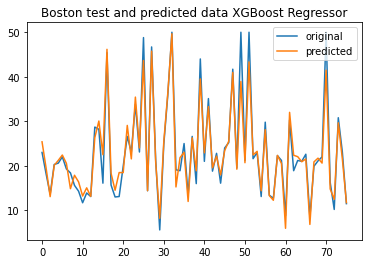

In [29]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label = 'original')
plt.plot(x_ax, ypred_xgbr, label="predicted")
plt.title("Boston test and predicted data XGBoost Regressor")
plt.legend()
plt.show()

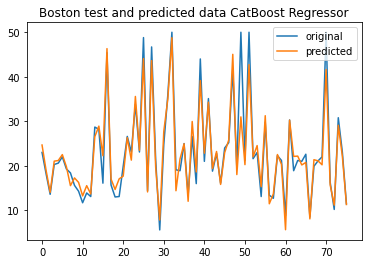

In [30]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label = 'original')
plt.plot(x_ax, ypred_cgbr, label="predicted")
plt.title("Boston test and predicted data CatBoost Regressor")
plt.legend()
plt.show()

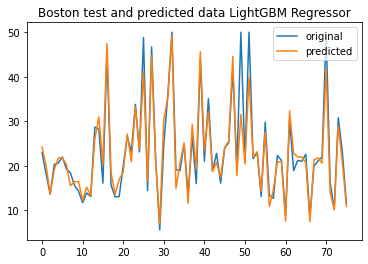

In [31]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label = 'original')
plt.plot(x_ax, ypred_lgbr, label="predicted")
plt.title("Boston test and predicted data LightGBM Regressor")
plt.legend()
plt.show()